In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
os.chdir(os.path.join('..', 'dynamic_programming'))
import import_ipynb
from grid_world import standard_grid, ACTION_SPACE
from iterative_policy_evaluation_deterministic import print_policy, print_values

importing Jupyter notebook from grid_world.ipynb
importing Jupyter notebook from iterative_policy_evaluation_deterministic.ipynb


In [2]:
GAMMA = 0.9

In [3]:
def play_game(grid, policy, max_steps = 20) :
    allowable_states = grid.actions.keys()
    grid.set_state(list(allowable_states) [np.random.choice(len(allowable_states))])
    
    s = grid.current_state()
    a = np.random.choice(grid.actions[s])
    states = [s]
    rewards = [0]
    actions = [a]
    count = 0
    while not grid.game_over() and count < max_steps :
        r = grid.move(a)
        s = grid.current_state()
        
        #update
        rewards.append(r)
        states.append(s)
        
        if not grid.is_terminal(s) :
            a = policy[s]
            actions.append(a)
        count += 1
        
    return states, rewards, actions

Rewards
+---+---+---+----+
| 0 | 0 | 0 |  1 |
+---+---+---+----+
| 0 | 0 | 0 | -1 |
+---+---+---+----+
| 0 | 0 | 0 |  0 |
+---+---+---+----+
Initial Policy
+---+---+---+---+
| R | R | L |   |
+---+---+---+---+
| D |   | R |   |
+---+---+---+---+
| U | L | R | L |
+---+---+---+---+
Final Policy
+---+---+---+---+
| R | R | R |   |
+---+---+---+---+
| D |   | U |   |
+---+---+---+---+
| R | R | U | L |
+---+---+---+---+
Values
+-------+-------+-------+-------+
| 0.787 | 0.889 | 1.000 | 0.000 |
+-------+-------+-------+-------+
| 0.587 | 0.000 | 0.892 | 0.000 |
+-------+-------+-------+-------+
| 0.649 | 0.725 | 0.802 | 0.720 |
+-------+-------+-------+-------+


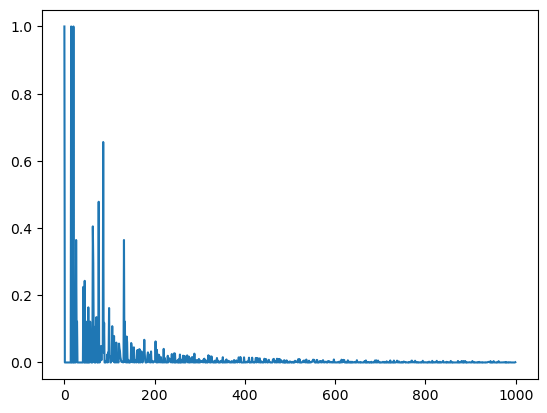

In [4]:
if __name__ == '__main__' :
    grid = standard_grid()
    
    print('Rewards')
    print_values(grid.rewards, grid)
    
    #initialize random policy
    policy = {}
    for k, v in grid.actions.items() :
        policy[k] = np.random.choice(v)
        
    print('Initial Policy')
    print_policy(policy, grid)
    
    Q = pd.DataFrame([], index=grid.actions.keys(), columns = ACTION_SPACE)
    returns = {}
    for state in grid.all_states() :
        for a in ACTION_SPACE :
            if not grid.is_terminal(state) :
                Q.loc[state, a] = 0
                returns[(state, a)] = []
            else :
                Q.loc[state, a] = 0
    
    all_states = list(grid.actions.keys())
    
    deltas = []
    #loop until convergence
    for i in range(1000) :        
        biggest_change = 0
        states, rewards, actions = play_game(grid, policy, max_steps=20)
        states_actions = list(zip(states, actions))
        
        G = 0
        for t in range(len(rewards) - 2, -1, -1) :
            G = rewards[t + 1] + GAMMA * G
            s_t = states[t]
            a_t = actions[t]
            
            
            if (s_t, a_t) not in states_actions[:t]:
                returns[(s_t, a_t)].append(G)
                old_q = Q.loc[s_t, a_t]
                Q.loc[s_t, a_t] = np.mean(returns[s_t, a_t])
                policy[s_t] = ACTION_SPACE[np.argmax(Q.loc[s_t, :])]
                
                biggest_change = max(biggest_change, np.abs(old_q - Q.loc[s_t, a_t]))
        deltas.append(biggest_change)
    
    plt.plot(deltas)
    print('Final Policy')
    print_policy(policy, grid)
    
    V = {}
    for i, row in Q.iterrows():
        V[i] = max(row)
    print('Values')
    print_values(V, grid)

In [5]:
Q

U         D         L         R
0 0       0.0  0.498737         0  0.787343
  1       0.0         0  0.714536   0.88875
  2       0.0         0  0.788684       1.0
1 0  0.481385  0.587116         0         0
  2  0.891921  0.686118         0      -1.0
2 0  0.472392         0         0   0.64907
  1       0.0         0  0.549052  0.725016
  2  0.802166         0    0.6561  0.492075
  3      -1.0       0.0  0.720217         0
0 3         0         0         0         0
1 3         0         0         0         0